### Visualizing Data
I will be using the data from 'Manipulating Dataframes' to create graphs with matplot-lib and seaborn.

##### Bargraph: Number of covid cases per establishment type.

{' Restaurant/Bar': 56, ' Gym': 13, ' Grocery Store': 4, ' School': 4, ' Mall': 3, ' Salon': 3, ' Cinema': 2, ' Coffee Shop': 2}


Text(0, 0.5, 'Number of Exposures')

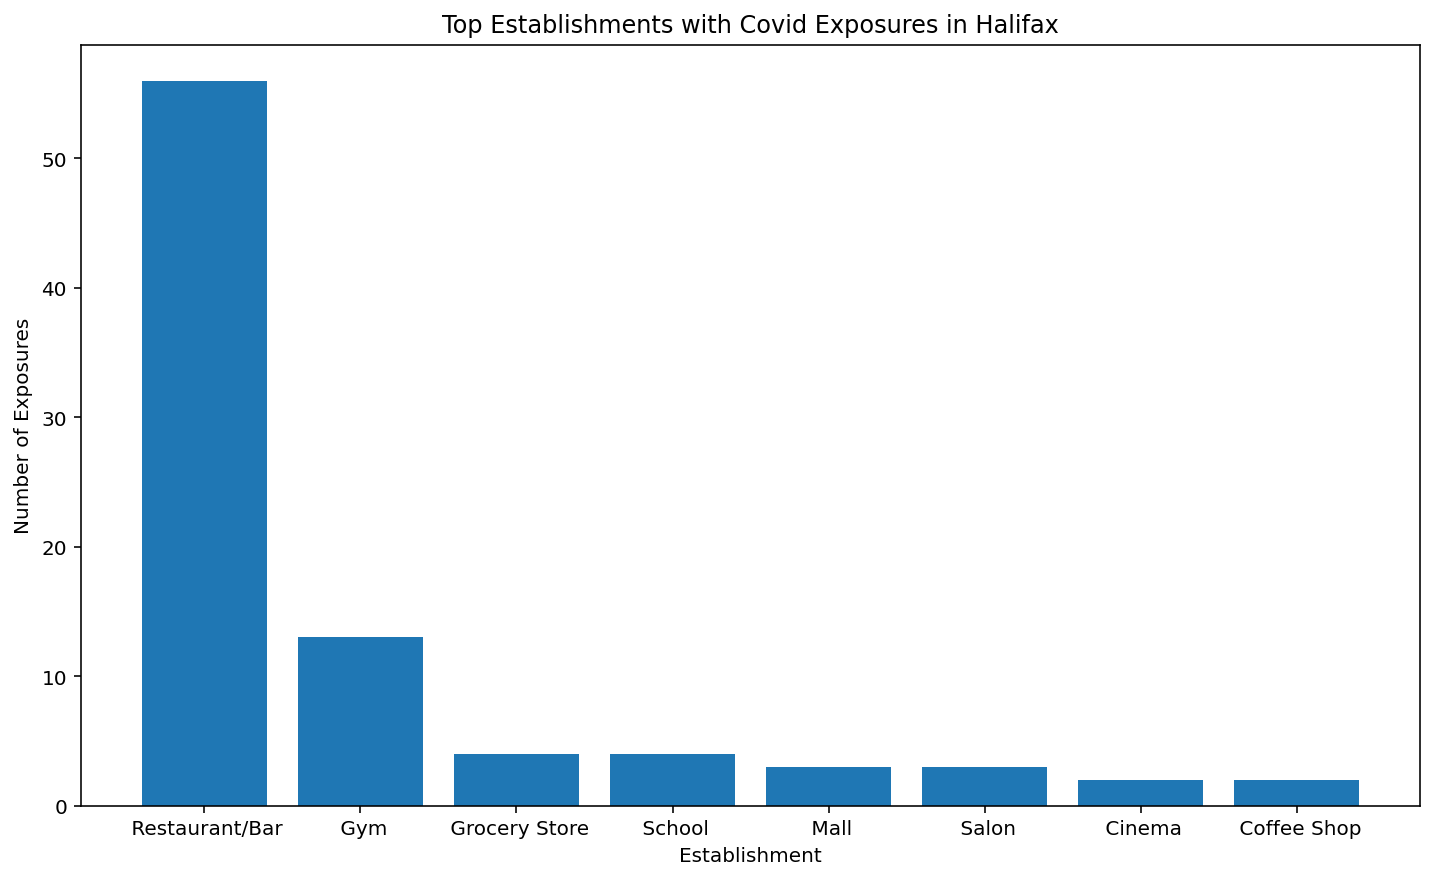

In [10]:
np_type = np.array(data['Establishment'])

#organizing locations by top covid cases
type_, counts = np.unique(np_type, return_counts=True)
a = dict(sorted((dict(zip(type_, counts))).items(), key=lambda item: item[1], reverse = True))
print(a)

#creating bargraph
df = pd.DataFrame(a.items(), columns=['Establishment', 'Num_exposures'])
df = df.iloc[:8]
plt.bar(df.Establishment, df.Num_exposures)
plt.title('Top Establishments with Covid Exposures in Halifax')
plt.xlabel('Establishment')
plt.ylabel('Number of Exposures')

##### Bargraph: Top 8 Streets with covid cases

Text(0, 0.5, 'Number of Exposures')

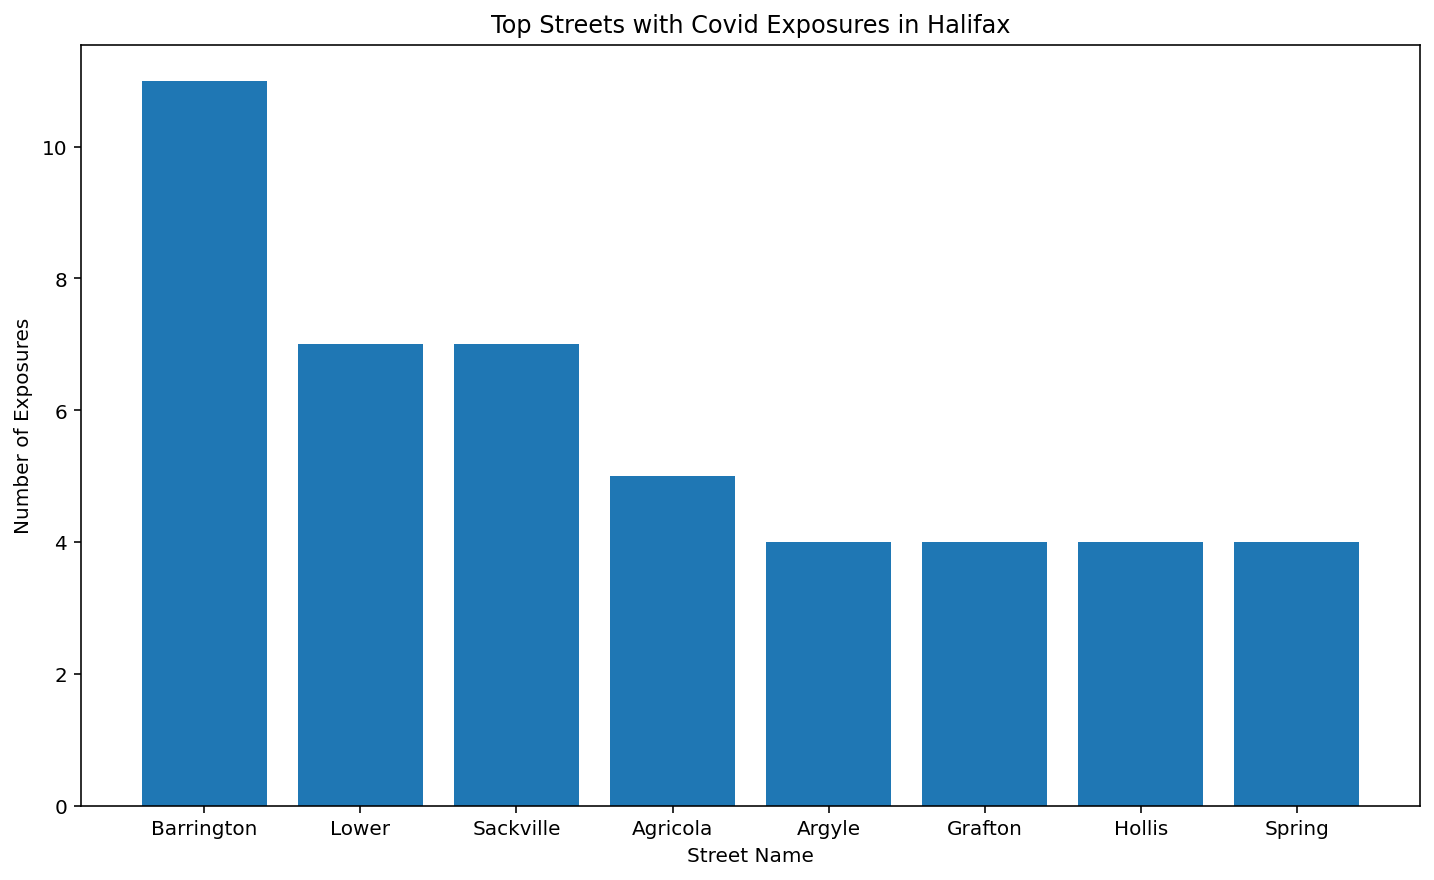

In [11]:
#dictionary of street name number of times that street has had an exposure
street, counts = np.unique(np_streets, return_counts=True)
d = dict(sorted((dict(zip(street, counts))).items(), key=lambda item: item[1], reverse = True))

#converting to df to plot
df = pd.DataFrame(d.items(), columns=['Street_name', 'Num_exposures'])
df = df.iloc[:8]
plt.bar(df.Street_name, df.Num_exposures)
plt.title('Top Streets with Covid Exposures in Halifax')
plt.xlabel('Street Name')
plt.ylabel('Number of Exposures')

### Heatmap: Number of exposures by street and establishment type

In [12]:
#grabbing the columns street and establishment
heat = data.loc[:, ['Street', 'Establishment']]
#calculating number of establishments per street name
heat = heat.pivot_table(index = ['Street'], columns = ['Establishment'], aggfunc = len, fill_value=0)
heat.head()

Establishment,Cinema,Coffee Shop,Grocery Store,Gym,Mall,Restaurant/Bar,Salon,School
Street,,,,,,,,
Agricola,0,0,0,0,0,5,0,0
Argyle,0,0,0,0,0,4,0,0
Barrington,0,0,2,0,0,9,0,0
Bedford,0,0,0,0,0,1,1,0
Brunswick,0,0,0,0,0,3,0,0


Text(0.5, 1.0, 'Top Covid Exposures Locations in Halifax')

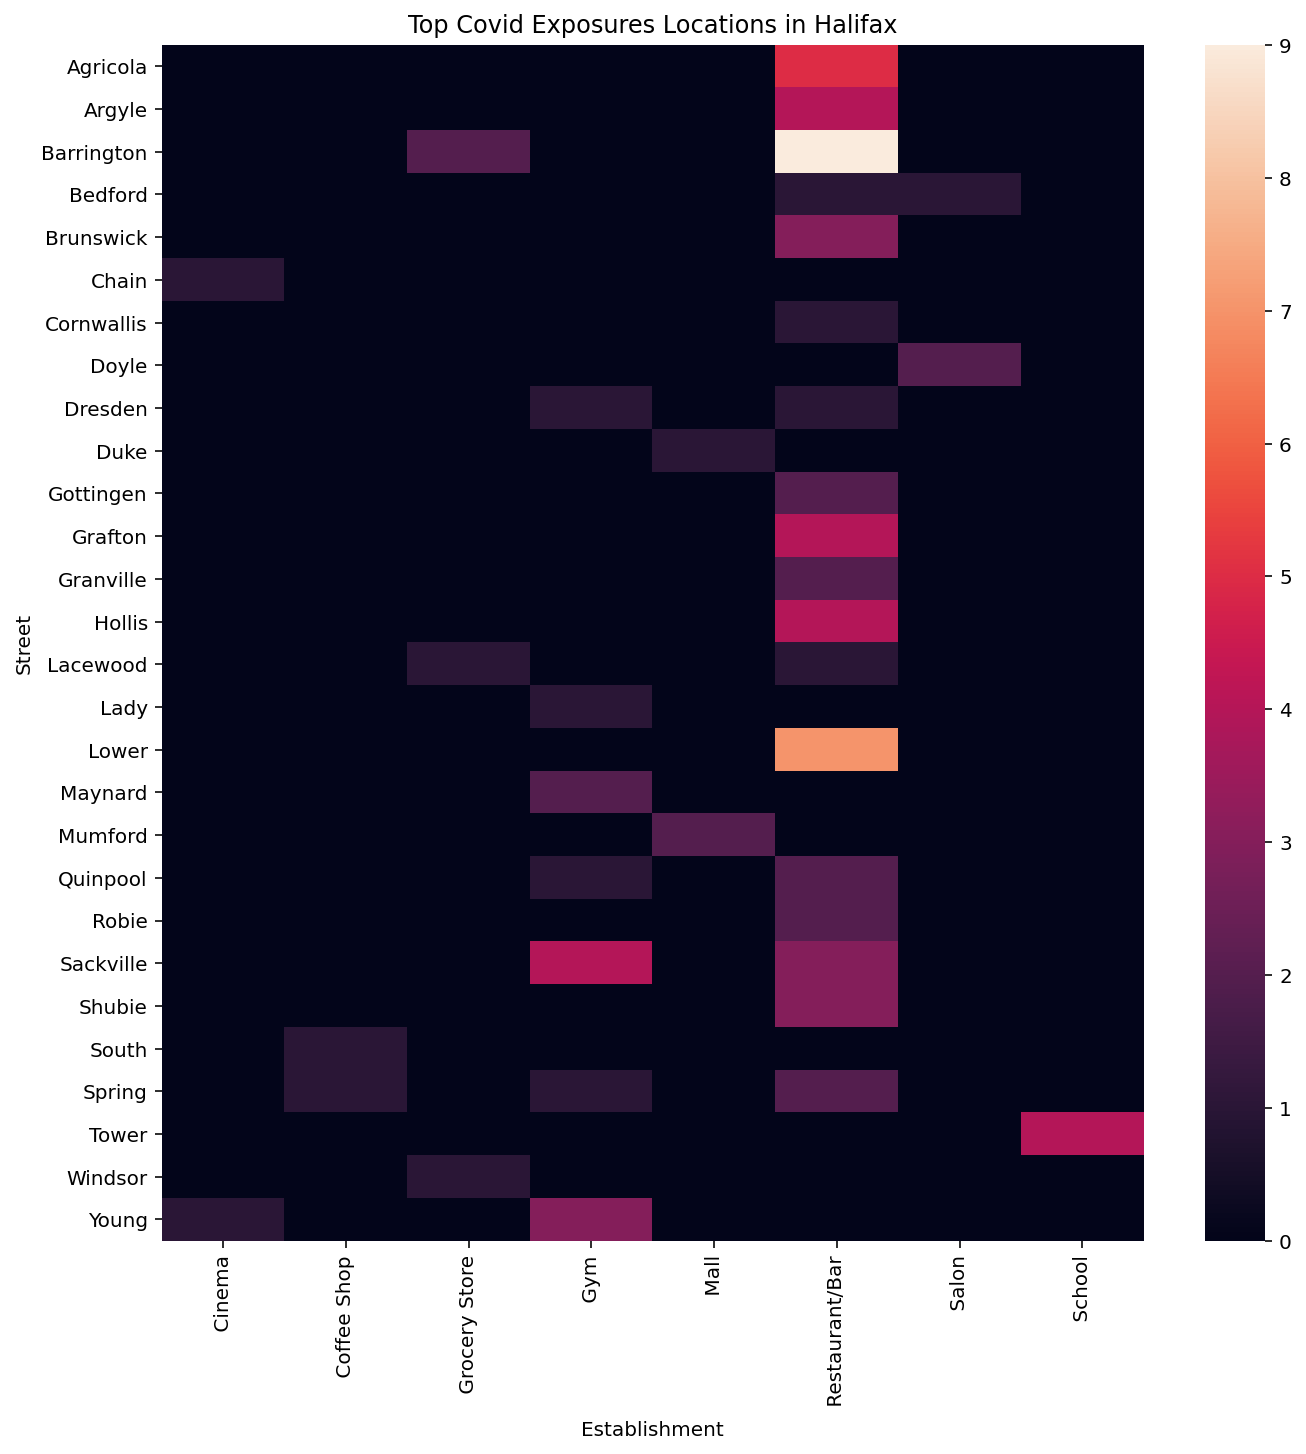

In [13]:
#creating heatmap
a4_dims = (11, 11)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(heat)
ax.set_title('Top Covid Exposures Locations in Halifax')